# COMS 3007: Machine Learning Assignment 2019 

__Students Contributing__

Simbarashe Mhlanga 1325952

Alec Mbangu

Kaira

Proxj




Ref of the dataset UCI Machine Learning Repository 
Dataset Name: Adult
Data Source:https://archive.ics.uci.edu/ml/datasets/Adult
#Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

In [1]:
import pandas as pd



# Read the online file through github, and assign it to variable "df"
import_source="https://raw.githubusercontent.com/SimbarasheJehol/MachineLearning_Project/master/adult.csv"
df = pd.read_csv(import_source,header=None)
print("data is loaded")






data is loaded


After reading the dataset, we can use the ___dataframe.head(n)___ method to check the top n rows of the dataframe; where n is an integer. Contrary to ___dataframe.head(n), dataframe.tail(n)__ will show you the bottom n rows of the dataframe


In [2]:
import numpy as np 
df.head(15) ##or dataframe.tail(n) for the last rows of the dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.shape #checking data shape 

(32561, 15)

As seen our dataset does not have the right headers for each column(feature) so we have to set the right name to the  columns 

In [4]:
headers=[
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "martial_status",
    "occupation",
    "RelationShip",
    "race","sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "class"
]
df.columns = headers
df.head(5)



,age,workclass,fnlwgt,education,education_num,martial_status,occupation,RelationShip,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Identifying missing values in our data.In our dataset the missing values are represented by a ?.We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience.

In [5]:
# replace "?" to NaN
df = df.replace(' ?', np.NaN)
for i in df: ## example to check if they are any '?' in our dataset 
    if i==" ?":
        print(i)
    



Using python built in functions to identify missing values.Using methods __isnull()__ and __notnull()__ and the output is boolen value indicating whether the value is missing.'True" means the value is missing and 'False' means the value is not missing.

In [6]:
missing_data = df.isnull()
missing_data.head(15)

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,RelationShip,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


And then we can count the number of values missing 

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

age
False    32561
Name: age, dtype: int64

workclass
False    30725
True      1836
Name: workclass, dtype: int64

fnlwgt
False    32561
Name: fnlwgt, dtype: int64

education
False    32561
Name: education, dtype: int64

education_num
False    32561
Name: education_num, dtype: int64

martial_status
False    32561
Name: martial_status, dtype: int64

occupation
False    30718
True      1843
Name: occupation, dtype: int64

RelationShip
False    32561
Name: RelationShip, dtype: int64

race
False    32561
Name: race, dtype: int64

sex
False    32561
Name: sex, dtype: int64

capital_gain
False    32561
Name: capital_gain, dtype: int64

capital_loss
False    32561
Name: capital_loss, dtype: int64

hours_per_week
False    32561
Name: hours_per_week, dtype: int64

native_country
False    31978
True       583
Name: native_country, dtype: int64

class
False    32561
Name: class, dtype: int64



Now we are going to replace values missing in terms of the data type

For column __workclass__ the datatype is string so we are going to replace the missing values with the most frequenty value in column

In [8]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

we are going to replace our missing values in the column using the most frequent class that is Private

In [9]:
df["workclass"].replace(np.NaN, "Private",inplace=True)
       

In [10]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

we replace missing values with Prof-speciality as it is the most frequent

In [11]:
df['occupation'].replace(np.NaN, "Prof-specialty" ,inplace=True)

In [12]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

we replace the missing values with United-States as it is the most frequent value

In [13]:
df['native_country'].replace(np.NaN, "United-States",inplace=True)

In [14]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


__Correct format?__ The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).
.__dtype()__ to check the data type

.__astype()__ to change the data type

In [15]:
df.dtypes #The output shows that every column is in true form(datatype)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
martial_status    object
occupation        object
RelationShip      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
class             object
dtype: object

Since we are trying to using classification algorithms we must group the continous variables into some bins that is transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In [16]:
df["age"]=df["age"].astype(int, copy=True) ##making sure we in the right format

In [17]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In our dataset, "age" is a real valued variable ranging from 36 to 86, it has 73 unique values.We may be intrested in some age group.

Text(0.5, 1.0, 'age bins')

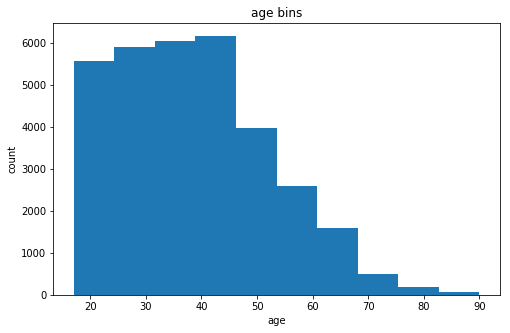

In [18]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#plt.pyplot.hist(df["age"])
df['age'].plot(kind='hist', figsize=(8, 5))


# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age bins")

In [19]:
bins = np.linspace(min(df["age"]), max(df["age"]), 10)
bins

array([17.        , 25.11111111, 33.22222222, 41.33333333, 49.44444444,
       57.55555556, 65.66666667, 73.77777778, 81.88888889, 90.        ])

In [20]:
group_names = ['starter_workclass', 'junior work_class', 'mid_workclass','senior_workclass','Advanced_workclass','diminishing_workclass','junior_retired','sineor_retired','Advanced_retired']

In [21]:
df['age-binned'] = pd.cut(df['age'], bins, labels=group_names, include_lowest=True )

In [22]:
df[['age','age-binned']].head(9)

,age,age-binned
0,39,mid_workclass
1,50,Advanced_workclass
2,38,mid_workclass
3,53,Advanced_workclass
4,28,junior work_class
5,37,mid_workclass
6,49,senior_workclass
7,52,Advanced_workclass
8,31,junior work_class


Text(0.5, 1.0, 'age bins')

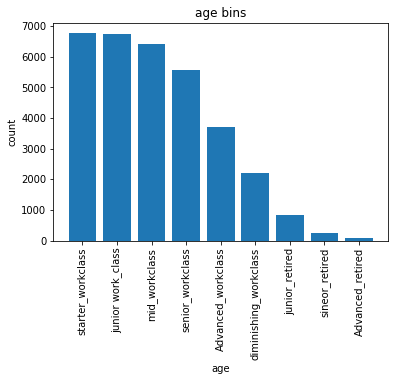

In [23]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
y=pyplot.bar(group_names, df["age-binned"].value_counts())
# df_age = df.loc['age','age-binned' ].head()
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age bins")





In [24]:
df['fnlwgt'].value_counts()

164190     13
203488     13
123011     13
113364     12
121124     12
126675     12
148995     12
123983     11
190290     11
126569     11
155659     11
102308     11
120277     11
241998     11
111483     11
120131     11
188246     11
117963     10
174789     10
112497     10
193882     10
125933     10
216129     10
99185      10
125461     10
155489     10
194630     10
125892     10
119793     10
177675     10
           ..
118352      1
239415      1
288341      1
34393       1
110172      1
188982      1
67794       1
343646      1
210527      1
269246      1
349795      1
63079       1
142924      1
1268339     1
542265      1
222789      1
54851       1
312897      1
58447       1
48702       1
378045      1
34361       1
357943      1
65078       1
68318       1
284211      1
312881      1
177711      1
179758      1
229376      1
Name: fnlwgt, Length: 21648, dtype: int64

Text(0.5, 1.0, 'fnlwgt bins')

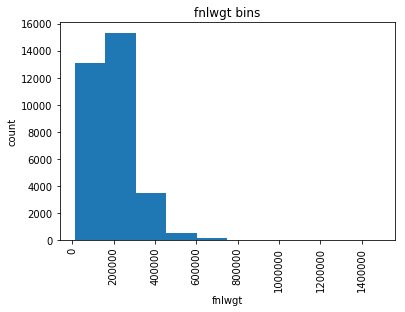

In [25]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["fnlwgt"])
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("fnlwgt")
plt.pyplot.ylabel("count")
plt.pyplot.title("fnlwgt bins")

In [26]:
bins = np.linspace(min(df["fnlwgt"]), max(df["fnlwgt"]), 6)
bins

array([  12285.,  306769.,  601253.,  895737., 1190221., 1484705.])

In [27]:
group_namesf=['class1','class2','class3','class4','class5']

In [28]:
df['fnlwgt-binned'] = pd.cut(df['fnlwgt'], bins, labels=group_namesf, include_lowest=True )

Text(0.5, 1.0, 'fnlwgt bins')

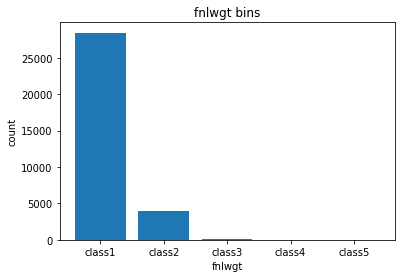

In [29]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesf, df["fnlwgt-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("fnlwgt")
plt.pyplot.ylabel("count")
plt.pyplot.title("fnlwgt bins")

In [30]:
df['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

Text(0.5, 1.0, 'education_num bins')

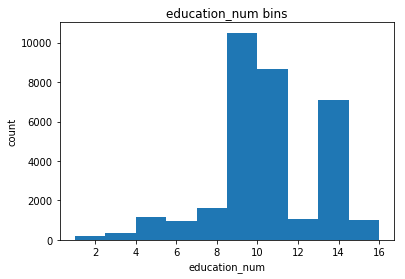

In [31]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["education_num"])

# set x/y labels and plot title
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("count")
plt.pyplot.title("education_num bins")

In [32]:
bins = np.linspace(min(df["education_num"]), max(df["education_num"]), 11)

bins

array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ])

In [33]:
group_namesEdu=['education1','education2','education3','education4','education5','education6','education7','education8','education9','education10']

In [34]:
df['education_num-binned'] = pd.cut(df['education_num'], bins, labels=group_namesEdu, include_lowest=True )

Text(0.5, 1.0, 'education_num bins')

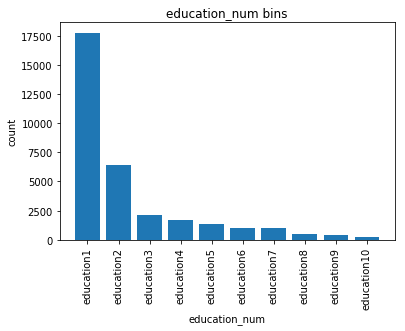

In [35]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesEdu, df["education_num-binned"].value_counts())
pyplot.xticks(rotation=90)

# set x/y labels and plot title
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("count")
plt.pyplot.title("education_num bins")

In [36]:
df[['education_num','education_num-binned']].head(10)

,education_num,education_num-binned
0,13,education8
1,13,education8
2,9,education6
3,7,education4
4,13,education8
5,14,education9
6,5,education3
7,9,education6
8,14,education9
9,13,education8


In [37]:
df['capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

Text(0.5, 1.0, 'capital_gain bins')

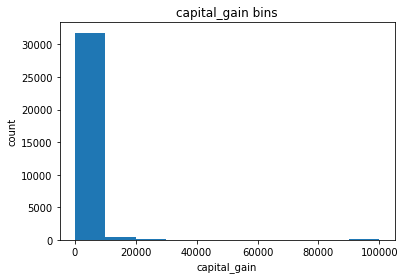

In [38]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["capital_gain"])

# set x/y labels and plot title
plt.pyplot.xlabel("capital_gain")
plt.pyplot.ylabel("count")
plt.pyplot.title("capital_gain bins")

In [39]:
bins = np.linspace(min(df["capital_gain"]), max(df["capital_gain"]), 11)
bins

array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
       69999.3, 79999.2, 89999.1, 99999. ])

In [40]:
group_namesCapitalG=['capital_gain1','capital_gain2','capital_gain3','capital_gain4','capital_gain5','capital_gain6','capital_gain7','capital_gain8','capital_gain9','capital_gain10']

In [41]:
df['capital_gain-binned'] = pd.cut(df['capital_gain'], bins, labels=group_namesCapitalG, include_lowest=True )

Text(0.5, 1.0, 'capital_gain bins')

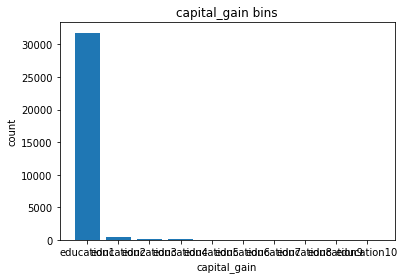

In [42]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesEdu, df["capital_gain-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("capital_gain")
plt.pyplot.ylabel("count")
plt.pyplot.title("capital_gain bins")

In [43]:
df['capital_loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
        ...  
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735        2
2238        2
2754        2
3004        2
3900        2
974         2
2149        2
1816        2
3770        2
2080        1
2489        1
2282        1
2163        1
155         1
2467        1
1844        1
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

Text(0.5, 1.0, 'capital_loss bins')

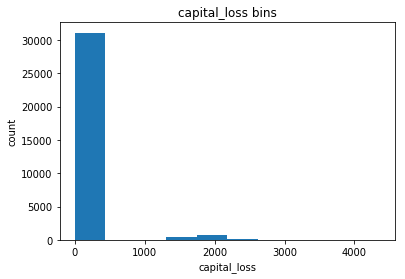

In [44]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["capital_loss"])

# set x/y labels and plot title
plt.pyplot.xlabel("capital_loss")
plt.pyplot.ylabel("count")
plt.pyplot.title("capital_loss bins")

In [45]:
bins = np.linspace(min(df["capital_loss"]), max(df["capital_loss"]), 10)
bins

array([   0.,  484.,  968., 1452., 1936., 2420., 2904., 3388., 3872.,
       4356.])

In [46]:
group_namesCapitalLoss=['capital_loss1','capital_loss2','capital_loss3','capital_loss4','capital_loss5','capital_loss6','capital_loss7','capital_loss8','capital_loss9']

In [47]:
df['capital_loss-binned'] = pd.cut(df['capital_loss'], bins, labels=group_namesCapitalLoss, include_lowest=True )

Text(0.5, 1.0, 'capital_loss bins')

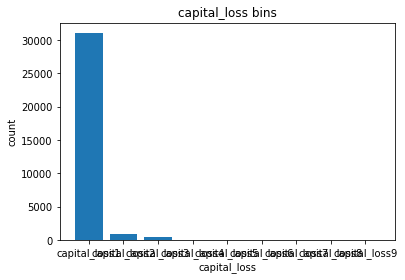

In [48]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesCapitalLoss, df["capital_loss-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("capital_loss")
plt.pyplot.ylabel("count")
plt.pyplot.title("capital_loss bins")

In [49]:
df['hours_per_week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64

Text(0.5, 1.0, 'hours_per_week bins')

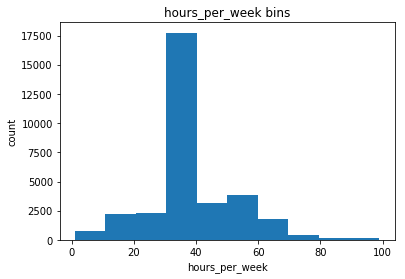

In [50]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["hours_per_week"])

# set x/y labels and plot title
plt.pyplot.xlabel("hours_per_week")
plt.pyplot.ylabel("count")
plt.pyplot.title("hours_per_week bins")

In [51]:
bins = np.linspace(min(df["hours_per_week"]), max(df["hours_per_week"]), 11)
bins

array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ])

In [52]:
group_namesHours=['hours1','hours2','hours3','hours4','hours5','hours6','hours7','hours8','hours9','hours10']

In [53]:
df['hours_per_week-binned'] = pd.cut(df['hours_per_week'], bins, labels=group_namesHours, include_lowest=True )

Text(0.5, 1.0, 'hours_per_week bins')

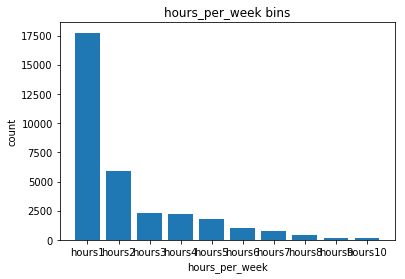

In [54]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesHours, df["hours_per_week-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("hours_per_week")
plt.pyplot.ylabel("count")
plt.pyplot.title("hours_per_week bins")

In [55]:
df[['hours_per_week','hours_per_week-binned']].head(20)

,hours_per_week,hours_per_week-binned
0,40,hours4
1,13,hours2
2,40,hours4
3,40,hours4
4,40,hours4
5,40,hours4
6,16,hours2
7,45,hours5
8,50,hours5
9,40,hours4


In [56]:
df.to_csv('dataProccesed.csv')

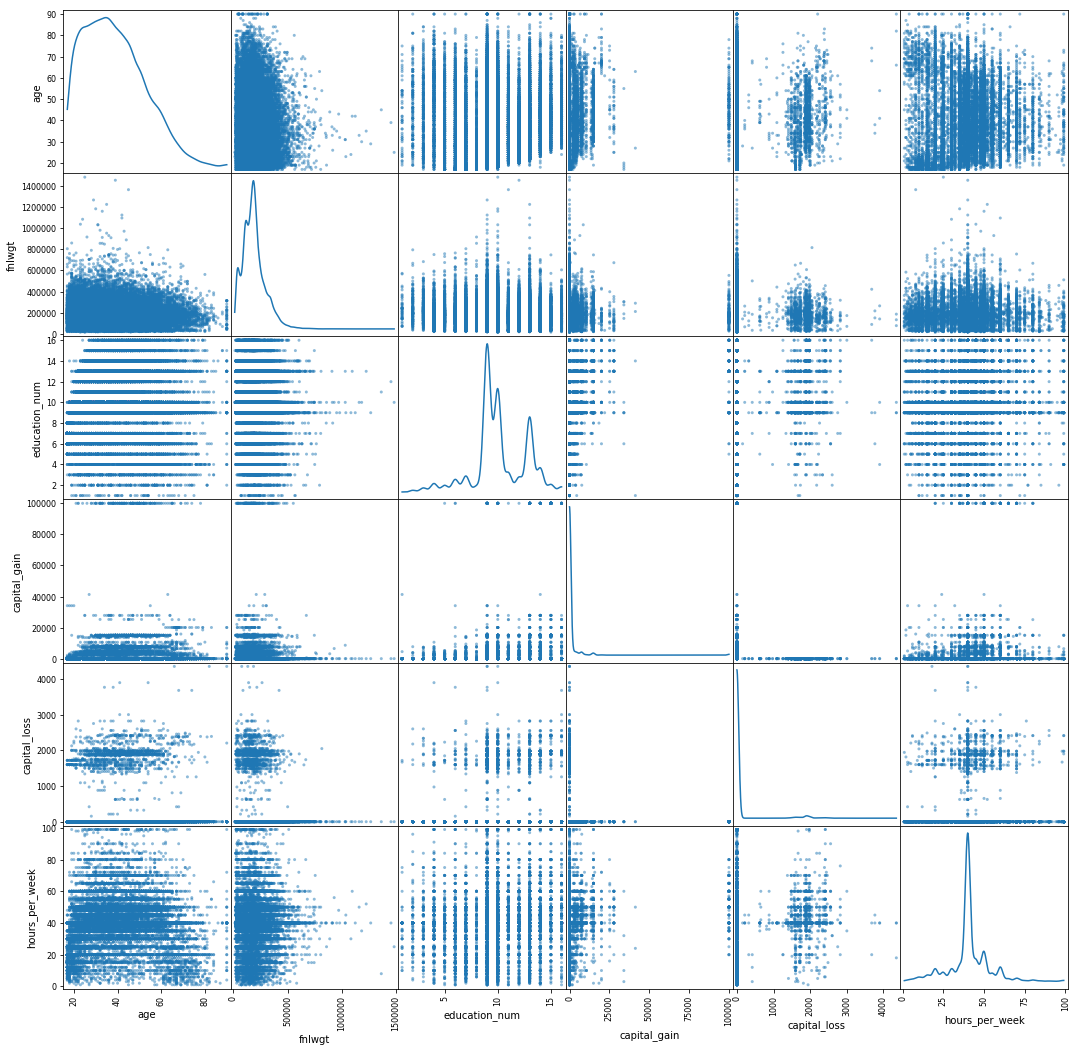

In [57]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=[18,18],diagonal='kde')
pass

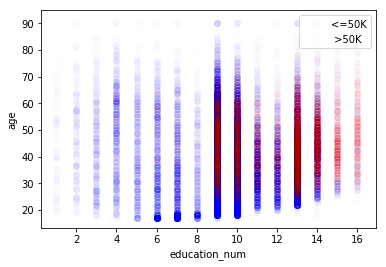

In [58]:
pyplot.scatter(df[df['class']==' <=50K']['education_num'],
            df[df['class']==' <=50K']['age'],
            alpha=0.01,
            label='<=50K',
            color='b'
            )
pyplot.scatter(df[df['class']==' >50K']['education_num'],
            df[df['class']==' >50K']['age'],
            alpha=0.01,
            label=' >50K',
            color='r'
            )
pyplot.legend()
# plt.pyplot.title("Relationship between age income and Number of study years")
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("age")
pyplot.show()

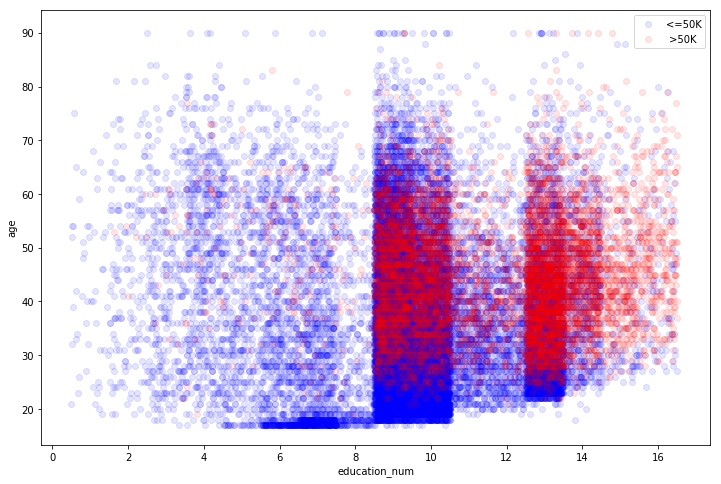

In [59]:
df['education_num_rand']= df['education_num'] +np.random.uniform(-0.5,0.5,len(df))
pyplot.figure(figsize=(12,8))
pyplot.scatter(df[df['class']==' <=50K']['education_num_rand'],
            df[df['class']==' <=50K']['age'],
            alpha=0.1,
            label='<=50K',
            color='b'
            )
pyplot.scatter(df[df['class']==' >50K']['education_num_rand'],
            df[df['class']==' >50K']['age'],
            alpha=0.1,
            label=' >50K',
            color='r'
            )
pyplot.legend()
# plt.pyplot.title("Relationship between age income and Number of study years")
plt.pyplot.xlabel("education_num")
plt.pyplot.ylabel("age")
pyplot.show()

# #Processing Text Feature

We have a lot data that is not numerical.Most of machine learning algorithms use numerical data as features.We process text data according to what does the text represents.Commonly you will find:

1 __None Organizable Categorical Text__

Process it using __Vectorizer__.This finds each value and makes it into a separate feature.For example if you have three values for city where users live (London,New Yok,Toronto)it will make three features each indicating if the user lives in that city 0=False and 1=True.


2  __Organizable Categorical Text
Convert to series of numbers__ representing the value.For example(Excellence,Good,Average,Bad,Terrible)can be converted to (5,4,3,2,1).

3 __Text Document__
Process it using __CountVectorizer__

In [60]:
df.to_csv('dataProccesed2.csv')
